
    This Source Code Form is subject to the terms of the Mozilla Public
    License, v. 2.0. If a copy of the MPL was not distributed with this
    file, You can obtain one at http://mozilla.org/MPL/2.0/.


In [51]:
# Enable automatic module reload
%load_ext autoreload
%autoreload 2

# To ease the loading of modules
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Load BEACS module
from agents.beacs import BEACS, BEACSConfiguration

# Load particular Environment Adapter
from my_examples.adapter.MountainCarEnvironmentAdapter import MountainCarEnvironmentAdapter

# Load Metrics
from my_examples.metrics.MountainCarMetrics import _mountaincar_metrics

# Load Plotting Wrappers
from my_examples.metrics.MountainCarPlottingWrapper import \
    parse_metrics_to_df, \
    plot_mountaincar_performance, \
    plot_average_mountaincar_performance

# Load environments
import gym

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Agent - BEACS

## Common parameters

In [52]:
#Environmental Set Up
CLASSIFIER_LENGTH = 2
NUMBER_OF_POSSIBLE_ACTIONS = 3
MOUNTAINCAR = "MountainCar-v0"
POS_BUCKETS = 20
VEL_BUCKETS = 20
MAX_EPISODE_STEPS = 1000

#Exploration Set Up
NUMBER_OF_EXPLORE_TRIALS = 2000
METRICS_TRIAL_FREQUENCY_EXPLORE = 1
EPSILON = 0.50
BETA_ALP = 0.05

#Exploitation Set Up
NUMBER_OF_EXPLOIT_TRIALS = 18000

#RL Set Up
GAMMA = 0.99
BETA_RL = 0.1

#BEACS Set Up
ENABLE_EP = True

#CRACS Set up
APPLY_CRACS = True
CRACS_KEEP_UNRELIABLE = True

#Seed
SEED = None

## Environment - MountainCar

In [53]:
# Initialize environment
MountainCar = gym.make(MOUNTAINCAR)
# To update the maximal number of step in a unique episode 
MountainCar._max_episode_steps = MAX_EPISODE_STEPS
# Reset it, by putting an agent into random position
state, _info = MountainCar.reset(seed=SEED)

## Training of BEACS - Exploration

In [54]:
%%time

cfg_explore = BEACSConfiguration(
    classifier_length=CLASSIFIER_LENGTH,
    number_of_possible_actions=NUMBER_OF_POSSIBLE_ACTIONS,
    environment_adapter=MountainCarEnvironmentAdapter(POS_BUCKETS, VEL_BUCKETS),
    user_metrics_collector_fcn=_mountaincar_metrics,
    metrics_trial_frequency=METRICS_TRIAL_FREQUENCY_EXPLORE,
    do_ep=ENABLE_EP,
    beta_alp=BETA_ALP,
    beta_rl=BETA_RL,
    gamma=GAMMA,
    epsilon=EPSILON,
    u_max=CLASSIFIER_LENGTH,
    mu=0.,
    chi=0.,
    bs_max=0,
    seed=SEED
)

agent_explore = BEACS(cfg_explore)
population_explore, metrics_explore = agent_explore.explore(MountainCar, NUMBER_OF_EXPLORE_TRIALS)

/Users/romain/miniconda3/envs/alcs/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


CPU times: user 46min 15s, sys: 17 s, total: 46min 32s
Wall time: 46min 58s


### Performance

In [55]:
print(_mountaincar_metrics(population_explore, MountainCar))

if APPLY_CRACS:
    agent_explore.apply_CRACS(keep_unreliable=CRACS_KEEP_UNRELIABLE)
    population_explore = agent_explore.get_population()

print(_mountaincar_metrics(population_explore, MountainCar))

{'population': 908, 'numerosity': 15649, 'reliable': 776}
{'population': 842, 'numerosity': 15511, 'reliable': 772}


/Users/romain/miniconda3/envs/alcs/lib/python3.10/site-packages/pandas/core/indexes/base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


Average number of reward to solve the mountaincar is  -838.7265  for a total of  2000  trials in EXPLORATION
Maximum average achieved: -661.4 for 100 episodes


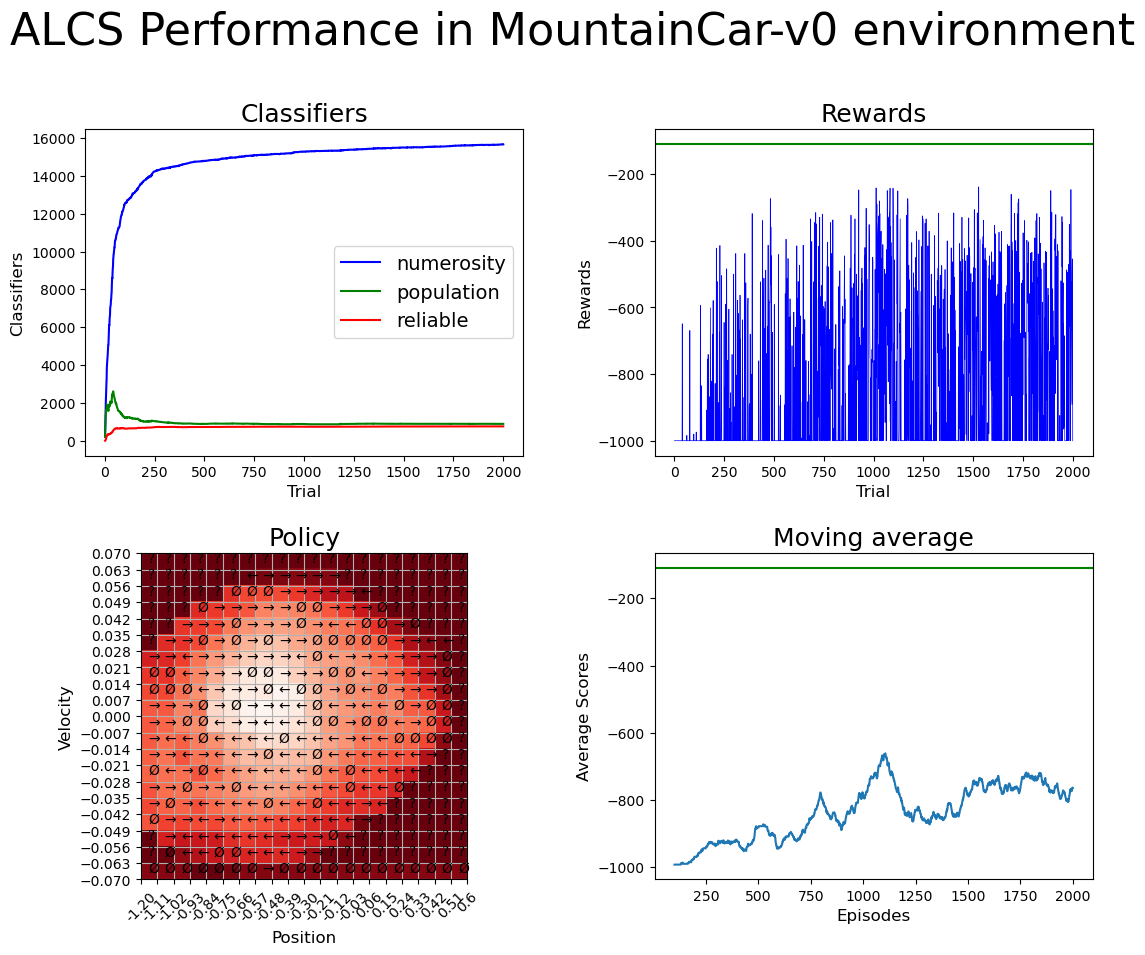

In [56]:
metrics_df = parse_metrics_to_df(metrics_explore, METRICS_TRIAL_FREQUENCY_EXPLORE, None)
plot_mountaincar_performance(metrics_df, MOUNTAINCAR, METRICS_TRIAL_FREQUENCY_EXPLORE, NUMBER_OF_EXPLORE_TRIALS, None, population_explore, POS_BUCKETS, VEL_BUCKETS, metrics_explore, None)

In [57]:
population_explore.sort(key=lambda cl: -cl.fitness)
population_explore_to_display = [cl for cl in population_explore]
print(len(population_explore_to_display))
print("\n")
for cl in population_explore_to_display[:]:
    print(cl)
    print("\n")

842


C:5.1 A:1 None E:(4.2:1)
q: 0.5213 r: -1.087 r_bis: 0.0    ir: -0.19  f: 0.0    err: 1.076 
exp: 3     num: 2 ee: False
Mark: 5.1 Can_be_generalized: [True, True] Aliased_state:  PAI_state: 
tga: 1580561 tbseq: 576633 talp: 1580561 tav: 3.346e+05 



C:14.18 A:0 None E:(15.17:1)
q: 0.5    r: 0.0    r_bis: 0.0    ir: 0.0    f: 0.0    err: 0.0   
exp: 1     num: 1 ee: False
Mark: empty Can_be_generalized: [True, True] Aliased_state:  PAI_state: 
tga: 1547846 tbseq: 1547846 talp: 1547846 tav: 0.0    



C:14.18 A:1 None E:(15.17:1)
q: 0.4999 r: -0.1997 r_bis: -0.1   ir: -0.271 f: -0.2   err: 0.2702
exp: 4     num: 1 ee: True
Mark: 14.18 Can_be_generalized: [True, True] Aliased_state:  PAI_state: 
tga: 1547845 tbseq: 1036808 talp: 1547845 tav: 1.278e+05 



C:5.1 A:2 None E:(4.2:1)
q: 0.5238 r: -0.1087 r_bis: -0.1942 ir: -0.271 f: -0.2076 err: 0.2718
exp: 4     num: 2 ee: True
Mark: 5.1 Can_be_generalized: [True, True] Aliased_state:  PAI_state: 
tga: 1034920 tbseq: 399477 talp: 1034

## Training of BEACS - Exploitation

In [58]:
%%time

cfg_exploit = BEACSConfiguration(
    classifier_length=CLASSIFIER_LENGTH,
    number_of_possible_actions=NUMBER_OF_POSSIBLE_ACTIONS,
    environment_adapter=MountainCarEnvironmentAdapter(POS_BUCKETS, VEL_BUCKETS),
    user_metrics_collector_fcn=_mountaincar_metrics,
    metrics_trial_frequency=1,
    do_ep=ENABLE_EP,
    beta_alp=BETA_ALP,
    beta_rl=BETA_RL,
    gamma=GAMMA,
    epsilon=0.,
    u_max=CLASSIFIER_LENGTH,
    mu=0.,
    chi=0.,
    bs_max=0,
    seed=SEED
)

agent_exploit = BEACS(cfg_exploit, population_explore)
population_exploit, metrics_exploit = agent_exploit.exploit(MountainCar, NUMBER_OF_EXPLOIT_TRIALS)

CPU times: user 39min 19s, sys: 11.6 s, total: 39min 31s
Wall time: 39min 48s


### Performance

Average number of reward to solve the mountaincar is  -838.7265  for a total of  2000  trials in EXPLORATION
Average number of rewards to solve the mountaincar is  -129.10216666666668  for a total of  18000  trials in EXPLOITATION with Reinforcement Module
Average number of rewards to solve the mountaincar is  -108.25  for the last 100 trials in EXPLOITATION with Reinforcement Module
Solved requirements at episode 10299: average -109.97 for 100 episodes
Maximum average achieved: -104.23 for 100 episodes


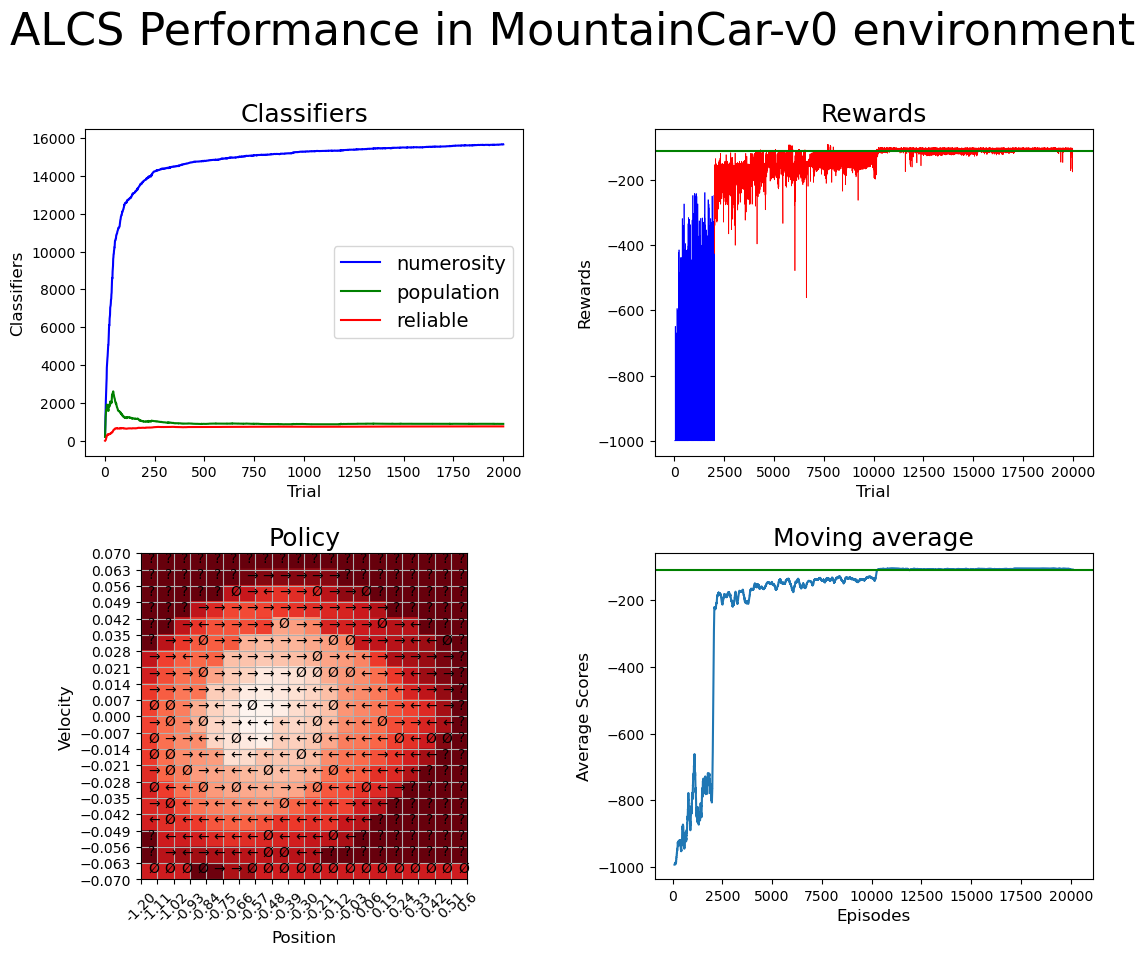

In [59]:
metrics_df = parse_metrics_to_df(metrics_explore, METRICS_TRIAL_FREQUENCY_EXPLORE, metrics_exploit)
plot_mountaincar_performance(metrics_df, MOUNTAINCAR, METRICS_TRIAL_FREQUENCY_EXPLORE, NUMBER_OF_EXPLORE_TRIALS, NUMBER_OF_EXPLOIT_TRIALS, population_exploit, POS_BUCKETS, VEL_BUCKETS, metrics_explore, metrics_exploit)

In [60]:
population_exploit.sort(key=lambda cl: -cl.fitness)
population_exploit_to_display = [cl for cl in population_exploit]
print(len(population_exploit_to_display))
print("\n")
for cl in population_exploit_to_display[:]:
    print(cl)
    print("\n")

842


C:4.1 A:1 None E:(3.2:1)
q: 0.4988 r: -0.1089 r_bis: -0.1047 ir: -0.19  f: -0.2099 err: 0.2027
exp: 3     num: 2 ee: False
Mark: 4.1 Can_be_generalized: [True, True] Aliased_state:  PAI_state: 
tga: 599716 tbseq: 227859 talp: 599716 tav: 1.24e+05 



C:5.1 A:2 None E:(4.2:1)
q: 0.5238 r: -1.084 r_bis: -0.6065 ir: -0.4686 f: -1.158 err: 1.422 
exp: 4     num: 2 ee: True
Mark: 5.1 Can_be_generalized: [True, True] Aliased_state:  PAI_state: 
tga: 1034920 tbseq: 399477 talp: 1034920 tav: 1.589e+05 



C:19.15 A:1 None E:(#.14:3, #.#:9)
q: 0.8595 r: -1.73  r_bis: -1.307 ir: -1.0   f: -1.521 err: 0.8159
exp: 12    num: 6 ee: True
Mark: 19.15 Can_be_generalized: [True, False] Aliased_state: 19.15 PAI_state: 
tga: 1515006 tbseq: 525342 talp: 1515006 tav: 8.665e+04 



C:5.1 A:1 None E:(4.2:1)
q: 0.5213 r: -1.087 r_bis: -0.8247 ir: -0.271 f: -1.582 err: 1.793 
exp: 3     num: 2 ee: False
Mark: 5.1 Can_be_generalized: [True, True] Aliased_state:  PAI_state: 
tga: 1580561 tbseq: 576633 talp